# CHAPTER 16: Stochastic Optimization

### This code runs simulations for Examples 4, 5, 7, 8, and 12 and generates figures 1, 2, 3, 4, 5, and 6 from Chapter 16: Stochastic Optimization (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

Required Libraries:

1. numpy
2. matplotlib

Required Functions:

1. generate_logistic
2. logistic_minimizer
3. soft_threshold
4. hadamard_product
5. svm_minimizer
6. lasso_minimizer

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from generate_logistic import generate_logistic
from logistic_minimizer import logistic_minimizer
from soft_threshold import soft_threshold
from hadamard_product import hadamard_product
from svm_minimizer import svm_minimizer
from lasso_minimizer import lasso_minimizer

## Example 16.4 (Delta rule from stochastic risk minimization)

We re-derive the same delta rule by considering instead the stochastic risk minimization problem:

$$ 
P(w) = \rho \|w\|^2 + \mathbb{E} \left[ (\boldsymbol{\gamma} - \mathbf{h}^{\sf T} w)^2 \right] \quad \text{(16.36)}
$$


where the loss function is now  given by

$$ 
Q(w; \boldsymbol{\gamma}, \mathbf{h}) = \rho \|w\|^2 + (\boldsymbol{\gamma} - \mathbf{h}^{\sf T} w)^2 \quad \text{(16.37a)} \\ 
\nabla_{w^{\sf T}} Q(w; \boldsymbol{\gamma}, \mathbf{h}) = 2 \rho w - 2 \mathbf{h} (\boldsymbol{\gamma} - \mathbf{h}^{\sf T} w) \quad \text{(16.37b)}
$$


In this case, the stochastic gradient iteration ($16.27$) leads  to the same delta rule:

$$
\mathbf{w}_n = \left(1 - 2\mu\rho\right) \mathbf{w}_{n-1} + 2\mu \mathbf{h}_n (\boldsymbol{\gamma}(n) - \mathbf{h}_n^{\sf T} \mathbf{w}_{n-1}) \quad \text{(16.38)}
$$

 
We illustrate the performance of the algorithm in Fig.~$16.1$, which shows the  learning curve in linear scale using $\rho=0.5$, $\mu=0.001$, and $M=10$. The simulation generates random pairs of data $\{\gamma(m),h_m\}$ according to 
a linear model. First, a random parameter model $w^a\in\mathbb{R}^{10}$ is selected, and a random collection of feature vectors $\{h_m\}$ are generated with zero-mean unit-variance Gaussian entries. Likewise, a collection of $N$ independent noise Gaussian entries $\{v(m)\}$  with zero mean and variance $\sigma_v^2=0.0001$ is generated. Then, each $\gamma(m)$ is set to 

$$
\gamma(m)=h_m^{\sf T} w^a + v(m) \quad \text{(16.39)}
$$

The minimizer $w^{o}$ for the risk  ($16.36$) can be determined in closed form and is given by

$$
w^o=(\rho I_M + R_h)^{-1}r_{h \gamma} \quad \text{(16.40)}
$$

where, for the simulated data,

$$
R_h = \mathbb{E}[\mathbf{h}\mathbf{h}^{\sf T}] = \mathbf{I}_M \quad (\text{by construction})  \quad \text{(16.41a)}
$$

$$
r_{h\gamma} \equiv \mathbb{E}[\boldsymbol{\gamma}\mathbf{h}] = \mathbb{E}[\mathbf{h}^{\sf T} \mathbf{w}^a + \mathbf{v}] \mathbf{h} = R_h \mathbf{w}^a = \mathbf{w}^a \quad \text{(16.41b)}
$$
In the stochastic gradient implementation ($16.38$), data $(\boldsymbol{\gamma}(n),\mathbf{h}_n)$ stream in, one pair at a time. The \textit{learning curve} of the stochastic algorithm is denoted by $P(n)$ and defined as 

$$
P(n) \triangleq \mathbb{E} P(\mathbf{w}_{n-1})\;\;\;\;\;\;\;(\textbf{learning curve}) \quad \text{(16.42)}
$$

where the expectation is over the randomness in the weight iterates. The learning curve shows how the risk value evolves on average over time. We can simulate the learning curve by using repeated experiments with each experiment having its own data and starting from the same initial condition. We construct the learning curve in this example  as follows. We generate $L$ replicas of $N=3000-$long data sequences $\{\gamma(m),h_m\}$ arising from the same  linear model to ensure they have the *same* statistical distribution. We subsequently run the stochastic gradient algorithm on each of these datasets,  always starting from the {\em same} initial condition $w_{-1}$. In the simulations we perform  $L=500$ experiments. Each experiment $\ell$ results in a realization for a risk curve of the form:

$$
\widehat{P}(w_{n-1}^{\ell})= \rho\|w_{n-1}^{\ell}\|^2\;+\;\Bigl(\gamma(n)-h_n^{\sf T} w_{n-1}^{\ell}\Bigr)^2,
\;\;0\leq n\leq N-1 \quad \text{(16.43)}
$$

This curve is evaluated at the successive weight iterates during the $\ell-$th experiment. By averaging the curves over all $L$ experiments we obtain an ensemble average approximation for the true risk value as follows:

$$
P(n)\approx \frac{1}{L}\sum_{\ell=1}^{L} \widehat{P}(w_{n-1}^{\ell}),\;\;0\leq n\leq N-1 \quad \text{(16.44)}
$$

where $P(n)$ denotes the estimate for the risk value $P(w)$ at the $n-$ th iteration of the algorithm. This is the curve that is shown in the left plot of Fig.$~16.1$.

wait...processing data
limit points w, minimizer ws, and initial model zo
[[-1.02722635]
 [ 0.24361385]
 [-1.00800929]
 [-0.01311849]
 [ 0.62848259]
 [ 0.73506804]
 [ 0.27711706]
 [-0.65076306]
 [ 0.49021668]
 [-0.22782096]]
[[-1.03751622]
 [ 0.21826984]
 [-1.04610659]
 [-0.04070968]
 [ 0.63347964]
 [ 0.73918358]
 [ 0.31811038]
 [-0.65498365]
 [ 0.5006101 ]
 [-0.19992792]]
[[-1.55627433]
 [ 0.32740476]
 [-1.56915989]
 [-0.06106452]
 [ 0.95021946]
 [ 1.10877537]
 [ 0.47716556]
 [-0.98247548]
 [ 0.75091515]
 [-0.29989188]]
limit risk values and squared norms (w-ws)^2
[2.86258124] 0.005587096015889043
Pmin
2.930191037047157
minimum risk value
[[2.99150963]]
step size
0.001
number of points
3000
rho
0.5
dimension of model
10
number of runs
500


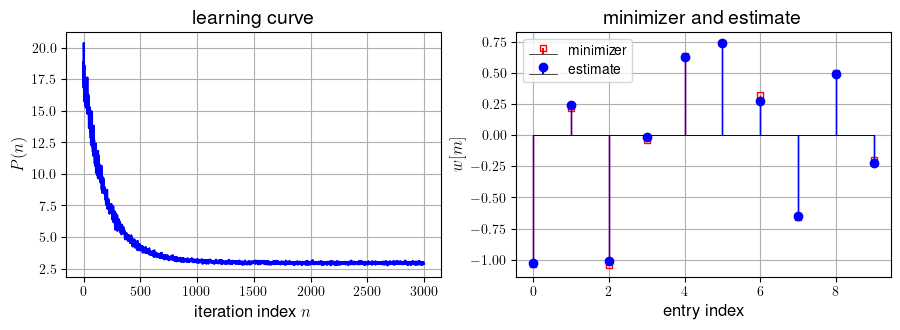

In [47]:
# l2-regularized mean-square error risk
# P(w) = rho\|w\|^2 + E (gamma-h'w)^2

rho = 0.5 # regularization parameter
mu = 0.001 # step-size for stochastic gradient

M = 10    # feature size
N = 3000  # number of data points
K = 500   # number of runs to generate learning curve

zo = np.random.randn(M).reshape(-1,1) # randomly chosen parameter model
w =  np.random.randn(M).reshape(-1,1)  # initial condition for weight under uniform sampling
winit = w.copy()
P = np.zeros(N).reshape(-1,1)  # learning curve over epochs under uniform sampling
        
# we use the linear model gamma = h'wo + v to generate data
stdv = 0.01 # standard deviation of measurement noise
Rh = np.eye(M) # covariance matrix of feature data
rhd = np.dot(Rh, zo) # cross-correlation vector
sigma_gamma_2 = stdv**2 + np.dot(zo.T, np.dot(Rh, zo))  # power of labels
ws = np.dot(np.linalg.inv(rho*np.eye(M) + Rh), rhd)  # minimizer of risk
Ps = rho*(np.linalg.norm(ws)**2) + sigma_gamma_2 - 2*np.dot(rhd.T, ws) + np.dot(ws.T, np.dot(Rh, ws)) # minimum risk value

print('wait...processing data')

for k in range(K): #iterating over runs
   # print("Run:", k+1)  # epoch index

    # Generate random data for each run assuming the same statistical model
    H = np.random.randn(M, N)  # feature vectors; one per column
    gamma_vec = np.dot(H.T, zo) + stdv*np.random.randn(N).reshape(-1,1)
    w = winit.copy()  # starting from the same initial condition

    for m in range(N):
        h_m = H[:, m].reshape(-1,1)  # feature vector
        gamma_m = gamma_vec[m]  # label
        a = gamma_m - np.dot(h_m.T, w)
        P[m] = P[m] + a**2  # instantaneous risk estimate

        s = 2 * h_m * a  # gradient vector
        w = (1 - 2 * mu * rho) * w + mu * s  # updated w (stochastic gradient implementation)
        #end of one epoch               

P = P / K
P = rho * (np.linalg.norm(w)**2) + P  # sample average learning curve

print('limit points w, minimizer ws, and initial model zo')
print(w)
print(ws)
print(zo)

print('limit risk values and squared norms (w-ws)^2')
print(P[N - 1], np.linalg.norm(w - ws)**2)

print('Pmin')
print(np.mean(P[N - 6:N - 1]))  # estimate of minimum value is average of large risk values after convergence.

print('minimum risk value')
print(Ps)

print('step size')
print(mu)

print('number of points')
print(N)

print('rho')
print(rho)

print('dimension of model')
print(M)

print('number of runs')
print(K)

# figure 1 (Ensemble average learning curve)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(9,6))

plt.subplot(221)
plt.plot(range(N), P, '-b', markersize = 1.5)  # learning curve
plt.xlabel('iteration index $n$', fontsize=12)
plt.ylabel('$$P(n)$$', fontsize=12)
plt.title('learning curve', fontsize=14)
plt.grid()

plt.subplot(222)
markerline, stemlines, baseline = plt.stem(ws, markerfmt='rs', linefmt='r', basefmt='k')
markerline.set_markerfacecolor('none') # make the squares hollow to match with the book
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5)
markerline.set_markersize(4)
markerline, stemlines, baseline = plt.stem(w, markerfmt='bo', linefmt='b', basefmt='k')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5)
plt.xlabel('entry index', fontsize=12)
plt.ylabel('$$w[m]$$', fontsize=12)
plt.title('minimizer and estimate', fontsize=14)
plt.axis('tight')
plt.grid()
plt.legend(['minimizer', 'estimate'])

plt.tight_layout()
plt.show()

**Figure $16.1$** *(Left)* Ensemble-average learning curve $P(n)$ for the stochastic gradient implementation ($16.27$)  in linear scale obtained by averaging over repeated experiments. (*Right*) Comparison of the minimizer $w^o$ and the limit iterate $w_n$ obtained at the end of one experiment.

## Example 16.5 (Logistic Regression)

Consider the $\ell_2-$regularized logistic regression empirical risk:

$$
  P(w) = \rho \|w\|^2 + \frac{1}{N}\sum_{m=0}^{N-1}\ln\left(1+e^{-\gamma(m)h_m^{\sf T} w}\right) \quad \text{(16.45)}
$$

for which,
 
\begin{align}
Q(w;\gamma(n),h_n) &= \rho\|w\|^2 + \ln\left(1+e^{-{\gamma}(n) h_n^{\sf T} w}\right) \quad \text{(16.46a)} \\
\nabla_{w^{\sf T}}\,Q(w;\gamma(n),h_n) &= 2\rho w - \frac{\gamma(n) h_n}{1+e^{{\gamma}(n) h_n^{\sf T} w}} \quad \text{(16.46b)}
\end{align}

The stochastic gradient iteration ($16.27$) becomes

$$
\mathbf{w}_{n}\;=\;\left(1-2\mu\rho\right)\mathbf{w}_{n-1}+\mu\frac{{\boldsymbol{\gamma}}(n) \mathbf{h}_n}{1+e^{{\boldsymbol{\gamma}}(n) \mathbf{h}_n^{\sf T} \mathbf{w}_{n-1}}},\;\;\;n\geq 0 \quad \text{(16.47)}
$$

We illustrate the performance of this algorithm in Fig.~$16.2$, which shows the normalized learning curves in logarithmic scale under uniform sampling and  random reshuffling, in addition to the learning curve for a mini-batch implementation.

The simulation uses $\rho=1$, $\mu=0.0001$, and $M=10$. It generates $N=500$ random pairs of data $\{\gamma(m),h_m\}$ according to a logistic model. First, a random parameter model $w^a\in\mathbb{R}^{10}$ is selected, and a random collection of feature vectors $\{h_m\}$ are generated, say, with zero-mean unit-variance Gaussian entries. Then, for each $h_m$, the label $\gamma(m)$ is set to either $+1$ or $-1$ according to the following construction:

$$
\gamma(m) = \begin{cases}
+1 & \text{if } \left(\dfrac{1}{1+e^{-h_m^{\sf T} w^a}}\right) \geq 0.5 \\
-1 & \text{otherwise} 
\end{cases} \quad \text{(16.48)}
$$


A total of $K=500$ epochs are run over the data. The learning curves are plotted in normalized logarithmic scale in line with construction ($11.65$), namely, 

$$
\ln\left(\frac{P(w_n)-P(w^\star)}{\max_{n}\{ P(w_n)-P(w^\star)\}}\right) \quad \text{(16.49)}
$$

where $w^{\star}$ is approximated by the limit value of the weight iterate after sufficient convergence. The mini-batch implementation employs mini-batches of size $B=5$ samples. Each learning curve is generated by plotting the value of the risk function at the start of each epoch, namely, $P(w_{-1}^k)$. 

wait....generating data
10
20
30
40
50
60
70
80
90
100
limit points sw, w, wbatch, wrr, ws
[[ 0.00960008]
 [ 0.05500035]
 [ 0.06997936]
 [ 0.01976619]
 [ 0.03433981]
 [ 0.01181774]
 [-0.010615  ]
 [ 0.06626382]
 [ 0.05353888]
 [ 0.02041151]] , 
 [[ 0.01153418]
 [ 0.05581737]
 [ 0.06770988]
 [ 0.01986118]
 [ 0.03676475]
 [ 0.01349739]
 [-0.01015281]
 [ 0.06585887]
 [ 0.05469827]
 [ 0.0228421 ]] , 
 [[ 0.01143785]
 [ 0.05665836]
 [ 0.0697279 ]
 [ 0.02041893]
 [ 0.0340811 ]
 [ 0.01037399]
 [-0.00993134]
 [ 0.06526832]
 [ 0.05305863]
 [ 0.02080635]] , 
 [[ 0.00954739]
 [ 0.0549076 ]
 [ 0.06994676]
 [ 0.01979036]
 [ 0.03436681]
 [ 0.0118672 ]
 [-0.01064871]
 [ 0.0662447 ]
 [ 0.05366015]
 [ 0.0203558 ]]
minimum and limit risk values and squared error norms of w-ws, wbatch-ws, wrr-ws
0.6731177723764041 , 0.6731735408841317 , 0.6731292634106351 , 0.6731178334704501 , 2.5898928379170836e-05 , 1.0612026077984425e-05 , 3.550937951534366e-08
Minimum risk values for stochastic gradient and batch
0.

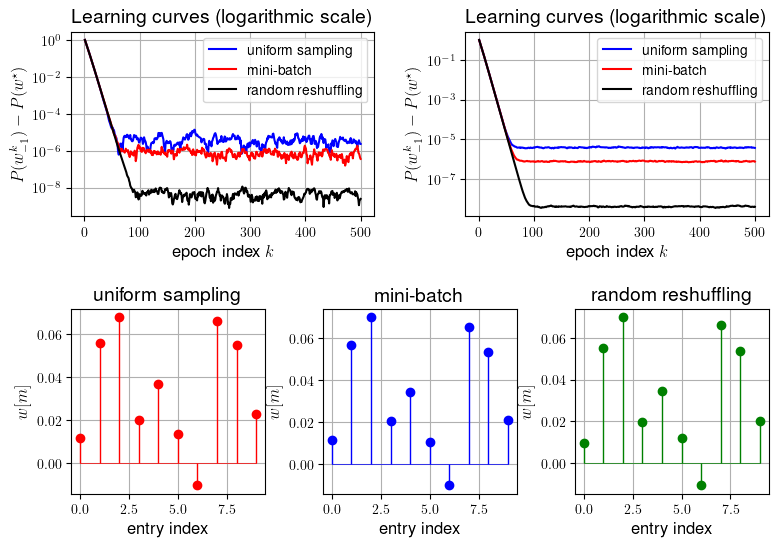

In [49]:
# l2-regularized logistic regression
# P(w) = rho\|w\|^2 + (1/N)sum_{n=0}^{N-1} ln(1+exp(-gamma(m) h_m' w))

# simulating stochastic gradient algorithm applied to an empirical risk

rho = 1          # l2-regularization parameter
mu = 0.0001      # step-size for stochastic gradient
mubatch = 0.0001 # step-size for batch implementation

M = 10   # feature size
N = 500  # number of data points
K = 500  # number of epochs
B = 5    # size of mini-batch

print('wait....generating data')

# Generating data and checking it
zo = np.random.rand(M).reshape(-1,1) # underlying parameter model for logistic data
p, gamma_vec, H = generate_logistic(N,zo,0) # logistic model with zero offset
ws, Ps, thetas = logistic_minimizer(rho, gamma_vec, H,0) # learns ws only

Pmean = np.zeros(K).reshape(-1,1) # learning curve over epochs under uniform sampling
Pbatchmean = np.zeros(K).reshape(-1,1) #learning curve over all epochs for minibatch
Prrmean = np.zeros(K).reshape(-1,1) # learning curve over epochs under random reshuffling

winit = np.random.randn(M).reshape(-1,1) # initial condition for weight
experiments = 100

for ell in range(1, experiments + 1):
    if ell % 10 == 0 :
        print(ell)
    P = np.zeros(K).reshape(-1,1)  # learning curve over epochs under uniform sampling
    Pbatch = np.zeros(K).reshape(-1,1)  # learning curve over all epochs for minibatch
    Prr = np.zeros(K).reshape(-1,1)  # learning curve over epochs under random reshuffling
    w = winit.copy()  # initial condition for weight under uniform sampling
    wbatch = winit.copy()  # same for batch implementation
    wrr = winit.copy()  # same for weight under random reshuffling

    for k in range(1, K + 1):  # iterating over runs
        # print("Run:", k+1)  # epoch index
        for m in range(N):  # evaluating empirical risk function at START of each epoch
            h_m = H[:, m].reshape(-1,1)  # feature vector
            gamma_m = gamma_vec[m]  # label
            a = 1 + np.exp(-gamma_m * np.dot(h_m.T, w))
            P[k - 1] = P[k - 1] + np.log(a)

            abatch = 1 + np.exp(-gamma_m * np.dot(h_m.T, wbatch))
            Pbatch[k - 1] = Pbatch[k - 1] + np.log(abatch)

            arr = 1 + np.exp(-gamma_m * np.dot(h_m.T, wrr))
            Prr[k - 1] = Prr[k - 1] + np.log(arr)

        P[k - 1] = (1 / N) * P[k - 1]  # uniform sampling
        P[k - 1] = P[k - 1] + rho * np.linalg.norm(w) ** 2  # risk  value at start of epoch k

        Pbatch[k - 1] = (1 / N) * Pbatch[k - 1]  # mini-batch
        Pbatch[k - 1] = Pbatch[k - 1] + rho * np.linalg.norm(wbatch) ** 2  # risk value at start of epoch k

        Prr[k - 1] = (1 / N) * Prr[k - 1]  # random reshuffling
        Prr[k - 1] = Prr[k - 1] + rho * np.linalg.norm(wrr) ** 2  # risk value at start of epoch k

        URR = np.random.permutation(N)  # random permutation of the samples

        for n in range(N):  # iterating over data in each epoch
            u = np.random.randint(N)  # uniform sampling
            h_u = H[:, u].reshape(-1,1)  # feature vector
            gamma_u = gamma_vec[u]  # label
            a = np.exp(-gamma_u * np.dot(h_u.T, w))
            s = gamma_u * h_u * a / (1 + a)  # gradient vector

            w = (1 - 2 * mu * rho) * w + mu * s  # updated w (stochastic gradient implementation)

            U = np.random.choice(N, B, replace=True)  # B random samples for batch implementation
            sbatch = np.zeros(M).reshape(-1,1)
            for b in range(B) :
                h_b = H[:, U[b]].reshape(-1,1)  # feature vector
                gamma_b = gamma_vec[U[b]]  # label
                abatch = np.exp(-gamma_b * np.dot(h_b.T, wbatch))
                sbatch += gamma_b * h_b * abatch / (1 + abatch)  # gradient vector
            sbatch /= B  # gradient vector for batch implementation
            wbatch = (1 - 2 * mubatch * rho) * wbatch + mubatch * sbatch  # updated w (stochastic mini-batch implementation)

            u = URR[n]  # random reshuffling
            h_u = H[:, u].reshape(-1,1)  # feature vector
            gamma_u = gamma_vec[u]  # label
            arr = np.exp(-gamma_u * np.dot(h_u.T, wrr))
            srr = gamma_u * h_u * arr / (1 + arr)  # gradient vector

            wrr = (1 - 2 * mu * rho) * wrr + mu * srr  # updated w (stochastic random reshuffling implementation)

    Pmean += P
    Pbatchmean += Pbatch
    Prrmean += Prr

Pmean = Pmean/experiments
Pbatchmean = Pbatchmean/experiments
Prrmean = Prrmean/experiments

print('limit points sw, w, wbatch, wrr, ws')
print(ws,', \n', w,', \n', wbatch,', \n', wrr)

print('minimum and limit risk values and squared error norms of w-ws, wbatch-ws, wrr-ws')
print(Ps[0,0], ',', Pmean[K - 1][0],',', Pbatchmean[K - 1][0],',', Prrmean[K - 1][0],',', np.linalg.norm(w - ws) ** 2,',', np.linalg.norm(wbatch - ws) ** 2,',', np.linalg.norm(wrr - ws) ** 2)

print('Minimum risk values for stochastic gradient and batch')
print(np.mean(Pmean[K - 5:K]),',', np.mean(Pbatchmean[K - 5:K]),',', np.mean(Prrmean[K - 5:K]))

print('step sizes')
print(mu,',', mubatch)

print('number of points')
print(N)

print('rho')
print(rho)

print('dimension of model')
print(M)

print('number of runs')
print(K)

#figure 2 (Learning curves)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(9, 6))

plt.subplot(221)
plt.semilogy(np.arange(1, K+1), (P - Ps) / np.max(P - Ps), '-b', np.arange(1, K+1), (Pbatch - Ps) / np.max(Pbatch - Ps), '-r', np.arange(1, K+1), (Prr - Ps) / np.max(Prr - Ps), '-k')
plt.xlabel('epoch index $k$', fontsize=12)
plt.ylabel('$P(w_{-1}^k) - P(w^\\star)$', fontsize=12)
plt.title('Learning curves (logarithmic scale)', fontsize=14)
plt.legend(['uniform sampling', 'mini-batch', 'random reshuffling'])
plt.grid()
plt.axis('tight')

plt.subplot(222)
plt.semilogy(np.arange(1, K+1), (Pmean - Ps) / np.max(Pmean - Ps), '-b', np.arange(1, K+1), (Pbatchmean - Ps) / np.max(Pbatchmean - Ps), '-r', np.arange(1, K+1), (Prrmean - Ps) / np.max(Prrmean - Ps), '-k')
plt.xlabel('epoch index $k$', fontsize=12)
plt.ylabel('$P(w_{-1}^k) - P(w^\\star)$', fontsize=12)
plt.title('Learning curves (logarithmic scale)', fontsize=14)
plt.legend(['uniform sampling', 'mini-batch', 'random reshuffling'])
plt.grid()
plt.axis('tight')

plt.subplot(234)
markerline, stemlines, baseline = plt.stem(w, markerfmt='ro', linefmt='r-', basefmt='r-')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5)
plt.xlabel('entry index', fontsize=12)
plt.ylabel('$w[m]$', fontsize=12)
plt.title('uniform sampling', fontsize=14)
plt.axis('tight')
plt.grid()

plt.subplot(235)
markerline, stemlines, baseline = plt.stem(wbatch, markerfmt='bo', linefmt='b-', basefmt='b-')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5)
plt.xlabel('entry index', fontsize=12)
plt.ylabel('$w[m]$', fontsize=12)
plt.title('mini-batch', fontsize=14)
plt.axis('tight')
plt.grid()

plt.subplot(236)
markerline, stemlines, baseline = plt.stem(wrr, markerfmt='go', linefmt='g-', basefmt='g-')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5)
plt.xlabel('entry index', fontsize=12)
plt.ylabel('$w[m]$', fontsize=12)
plt.title('random reshuffling', fontsize=14)
plt.axis('tight')
plt.grid()

plt.subplots_adjust(wspace=  0.3, hspace=0.5)
plt.savefig('fig2-ch16.pdf', format='pdf')
plt.show()

**Figure 16.2** (*Top left*) Learning curves $P(w_{-1}^k)$ relative to the minimum risk value $P(w^{\star})$ in normalized logarithmic scale for the stochastic gradient implementation ($16.47$) under uniform sampling and random reshuffling, in addition to the learning curve for the mini-batch implementation. (*Top right*) The learning curves are smoothed over $L=100$ experiments. (*Bottom*) Limiting values for the weight iterates under three data sampling policies. 



The plot on the left in the top row of the figure shows the evolution of these values relative to the minimum risk value $P(w^{\star})$ for one experiment using $K=500$ epochs. The noisy variations in these learning curves are a reflection of the stochastic nature of the updates. We repeat this experiment for a total of $L=100$ times and average the learning curves, with each experiment starting from the same initial condition $\mathbf{w}_{-1}$. The result leads to the smoother curves shown in the plot on the right in the top row of the figure.  The curves illustrate the improved performance that is delivered by the mini-batch and random reshuffling versions of the stochastic gradient algorithm; these observations will be established analytically in our future derivations  --- see Table$~16.2$.  The plots in the bottom row show the limiting value of the weight iterates under the three data sampling policies at the end of one experiment involving $K=500$ runs. 

## Example 16.7 (Recommender systems and matrix factorization)

We provide an example with a nonconvex risk function, which is widely used in the design of *recommender systems*. These are automated systems used to suggest recommendations to users for products  based on their past preferences and the preferences of other similar users. Such systems are widely used by online business sites.  We motivate the approach by considering the example of a streaming movie service.

 Assume there are $U$ users, labeled $u=1,2,\ldots,U$, and $I$ items (i.e., movies), labeled $i=1,2,\ldots, I$. Based on past interactions between the users and the service provider, the users have provided ratings for different movies (say, on a numerical scale from 1 = poor to 5 = excellent). Table~$16.1$ shows one example of the type of information that is available. Each row corresponds to a user $u$, and each column corresponds to a movie item, $i$. The table shows data for nine movies and seven users. Usually, users rate only some of the movies; they may not have watched all movies and they may not provide feedback on all movies they  watch. For this reason, some entries in the table are marked with question marks to indicate that these ratings are missing.

**Table 16.1** Ratings provided by users for some movie items from the service provider.
<table style="width: 70%;">
    <tr>
    <th>user</th>
    <th>U1</th>
    <th>U2</th>
    <th>U3</th>
    <th>U4</th>
    <th>U5</th>
    <th>U6</th>
    <th>U7</th>
  </tr>
  <tr>
    <th>M1</th>
    <th>3</th>
    <th>3</th>
    <th>?</th>
    <th>?</th>
    <th>3</th>
    <th>?</th>
    <th>?</th>
  </tr>
  <tr>
    <th>M2</th>
    <th>?</th>
    <th>4</th>
    <th>5</th>
    <th>?</th>
    <th>2</th>
    <th>3</th>
    <th>1</th>
  </tr>
  <tr>
    <th>M3</th>
    <th>4</th>
    <th>?</th>
    <th>2</th>
    <th>?</th>
    <th>4</th>
    <th>3</th>
    <th>?</th>
  </tr>
  <tr>
    <th>M4</th>
    <th>?</th>
    <th>?</th>
    <th>1</th>
    <th>4</th>
    <th>?</th>
    <th>2</th>
    <th>?</th>
  </tr>
  <tr>
    <th>M5</th>
    <th>1</th>
    <th>2</th>
    <th>1</th>
    <th>?</th>
    <th>3</th>
    <th>2</th>
    <th>?</th>
  </tr>   
  <tr>
    <th>M5</th>
    <th>1</th>
    <th>2</th>
    <th>1</th>
    <th>?</th>
    <th>3</th>
    <th>2</th>
    <th>?</th>
  </tr>  
  <tr>
    <th>M6</th>
    <th>5</th>
    <th>?</th>
    <th>2</th>
    <th>?</th>
    <th>3</th>
    <th>?</th>
    <th>3</th>
  </tr>
  <tr>
    <th>M7</th>
    <th>?</th>
    <th>4</th>
    <th>4</th>
    <th>?</th>
    <th>3</th>
    <th>1</th>
    <th>?</th>
  </tr>
  <tr>
    <th>M8</th>
    <th>?</th>
    <th>4</th>
    <th>5</th>
    <th>2</th>
    <th>3</th>
    <th>?</th>
    <th>2</th>
  </tr>
  <tr>
    <th>M8</th>
    <th>?</th>
    <th>4</th>
    <th>5</th>
    <th>2</th>
    <th>3</th>
    <th>?</th>
    <th>2</th>
  </tr>
  <tr>
    <th>M9</th>
    <th>1</th>
    <th>?</th>
    <th>3</th>
    <th>5</th>
    <th>?</th>
    <th>1</th>
    <th>4</th>
  </tr>
</table>

 We collect all ratings into a $U\times I$ user-item (or ratings) matrix $R=[r_{ui}]$; it contains all the scores from the table, with $r_{ui}$ representing the score given by user $u$ for item $i$. Some entries in the matrix $R$ will be missing and we mark them by a question mark. We denote the set of  available entries in $R$ by ${\cal R}$. Thus, when we write $(u,i)\in{\cal R}$ we mean that entry $r_{ui}$ has a valid ratings score. The objective of a recommender system is to predict what ratings users are likely to provide in place of the question marks. For example, referring to the table, we would like to know what ratings user U1 is likely to provide to movies M2, M4, M7, and M8. Based on these predictions, the service provider will then recommend some movies to the user. There are several methods that can be used to predict the numerical values for the missing entries (i.e., to perform what is known as *imputation* or matrix completion). Here, we follow one approach known as *collaborative filtering*. It is based on exploiting relationships between users and using a convenient matrix factorization.

We assume that each item $i$ can be represented by a feature vector $h_i\in\mathbb{R}^{M}$; the entries of this vector are called *latent* variables because they are hidden  and will need to be discovered or learned. For example, for the case of movies, the entries of $h_i$ could be some explicit attributes that relate to the type of  movie (comedy, action, thriller, etc.), the duration of the movie, if the movie has won any awards, or  other more implicit attributes. Since the latent variables will be discovered by the matrix factorization approach,  they may not relate directly to explicit attributes.

We further assume that each user $u$ employs a weight vector $w_u\in\mathbb{R}^{M}$ to arrive at its ratings. The entries of this vector scale different attributes for the item (or movie) differently. Some users  prefer comedy movies over suspense movies, or shorter movies over longer movies. If we happen to know the feature representation $h_i$ for some item $i$, then we model the rating process used by user $u$ as computing the inner product: 

$$
r_{ui} \approx  h_i^{\sf T} w_u -\theta \quad \text{(16.53)}
$$

where $\theta$ models some bias term. For example, some users may provide consistently higher-than-average ratings, or some items (movies) may be perceived consistently as being superior to other movies. These perceptions can bias the rating process. To be more specific, we should split the bias into two sources: one arises from user-related biases (users behave differently) and the second arises from item-related biases  (some items elicit different types of reactions from users, perhaps because they are promoted more strongly than other movies). For this reason, it is common to replace the above ratings generation model by one of the form:

$$
r_{ui} \approx h_i^{\sf T} w_u -\theta_u-\alpha_i,\;\;u=1,2,\ldots, U,\;\;i=1,2,\ldots I \quad \text{(16.54)}
$$

with two scalar bias terms $\{\theta_u, \alpha_i\}$: one by the user and the other by the item. If we collect the feature vectors into an $M\times I$ matrix $H$ and all user models into a $U\times M$ matrix $W$, a $U\times 1$ vector $\theta_{U}$, and an $I\times 1$ vector $\alpha$:

$$
H = \begin{bmatrix} h_1 & h_2 & \ldots & h_I \end{bmatrix}, \quad
W = \begin{bmatrix} w_1^\intercal \\ w_2^\intercal \\ \vdots \\ w_U^\intercal \end{bmatrix}, \quad
\theta = \begin{bmatrix} \theta_1 \\ \theta_2 \\ \vdots \\ \theta_U \end{bmatrix}, \quad
\alpha = \begin{bmatrix} \alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_I \end{bmatrix} \quad \text{(16.55)}
$$

then expression ($16.54$) amounts to assuming that the ratings matrix $R$ is generated according to the model:

$$
R \approx  WH - \theta \mathbf{1}_I^\intercal - \mathbf{1}_U \alpha^\intercal = 
\begin{bmatrix}
W & -\theta & \mathbf{1}_U
\end{bmatrix}
\begin{bmatrix}
H \\
\mathbf{1}_I^\intercal \\
-\alpha^\intercal
\end{bmatrix} \quad \text{(16.56)}
$$

This expression factors $R$ into the product of two matrices; the first has $M+2$ columns and the second has $M+2$ rows. If we succeed in determining the quantities $\{W,H,\theta,\alpha\}$, then we can use relation ($16.56$) to predict the ratings at all locations in $R$. For this purpose, we will  minimize the following regularized least-squares risk function:

$$
\Bigl\{\widehat{w}_u,\widehat{h}_i,\widehat{\theta}_u,\widehat{\alpha}_i\Bigr\} =
\underset{\{w_u,h_i,\theta_u,\alpha_i\}}{\text{argmin}}\;\;
\Bigg\{
\sum_{u=1}^U \rho \|w_u\|^2+\sum_{i=1}^I \rho \|h_i\|^2+
$$
$$
\quad\quad\quad\quad\quad
\sum_{(u,i)\in{\cal R}}
\Bigl(r_{ui}-h_i^\intercal w_u+\theta_u+\alpha_i\Bigr)^2
\Bigg\} \quad \text{(16.57)}
$$


where the last sum is over the valid indices $(u,i)\in{\cal R}$. The above risk function is nonconvex because of the products $h_i^{\sf T} w_u$. We can approximate the solution by means of a stochastic gradient implementation, which takes the form shown in listing ($16.58$). The entries of the initial iterates $\mathbf{w}_{u,-1}$ and $\mathbf{h}_{i,-1}$ are selected at random from a uniform distribution in the range $[0,1/\sqrt{M}]$.

$$
\begin{array}{l}
\hline
\textbf{Stochastic gradient algorithm applied to  recommender problem ($16.57$).}\\\hline\hline
\text{given valid ratings in locations $(u,i)\in{\cal R}$;}\\ 
\text{start from arbitrary}\;\{\mathbf{w}_{u,-1},\mathbf{h}_{i,-1},\boldsymbol{\theta}_u(-1),\boldsymbol{\alpha}_i(-1)\}.\\
\textbf{repeat  until convergence over $m\geq 0$: }\\
\quad\;\;\vert\;\; \text{select a random entry $(\mathbf{u},\mathbf{i})\in{\cal R}$}\\
\quad\;\;\vert\;\; \mathbf{w}_{\mathbf{u},m} = (1-2\mu\rho)\mathbf{w}_{\mathbf{u},m-1}+2\mu \mathbf{h}_{\mathbf{i},m-1}\mathbf{e}(m)\\
\quad\;\;\vert\;\; \mathbf{h}_{\mathbf{i},m}= (1-2\mu\rho)\mathbf{h}_{\mathbf{i},m-1}+2\mu \mathbf{w}_{\mathbf{u},m-1}\mathbf{e}(m)\\
\quad\;\;\vert\;\; \boldsymbol{\theta}_{\mathbf{u}}(m)=\boldsymbol{\theta}_{\mathbf{u}}(m-1)-2\mu\mathbf{e}(m)\\
\quad\;\;\vert\;\; \boldsymbol{\alpha}_{\mathbf{i}}(m)=\boldsymbol{\alpha}_{\mathbf{i}}(m-1)-2\mu\mathbf{e}(m)\\
\quad \textbf{end}\\
\quad\text{return } \{w_u^{\star},h_i^{\star},\theta_{u}^{\star},\alpha_i^{\star}\}\\\hline
\end{array} \quad \text{(16.58)}
$$ 


In the above listing, the term $w_{u,m}$ represents the estimate for $w_u$ at iteration $m$; likewise for $h_{i,m}$, $\theta_u(m)$, and $\alpha_i(m)$. It is useful to note that although the recursions for updating $\theta_u$ and $\alpha_i$ look similar, these variables will generally be updated at different instants. This is because the same $i$ will appear under different $u$ values, and the same $u$ will appear with  different $i$ values. Later, in Example$~50.6$, we revisit this problem and solve it by applying an alternating least-squares solution.
We also revisit the same problem in Example$~68.2$ and solve it by employing variational autoencoders.

We simulate recursions ($16.58$) by generating a random ratings matrix $R$ with $U=10$ users and $I=10$ items. The scores are integer numbers in the range $1\leq r\leq 5$, and unavailable scores are indicated by the symbol ?:

$$
R = 
\begin{bmatrix}
5  &   3  &   2  &   2  &   \color{red}{\bf ?}  &   3  &   4  &   \color{red}{\bf ?}  &   3  &   3\\
5  &   4  &   1  &   3  &   1  &   4  &   4  &   \color{red}{\bf ?}  &   3  &   \color{red}{\bf ?}\\
3  &   5  &   \color{red}{\bf ?}  &   2  &   1  &   5  &   4  &   1  &   4  &   1\\
\color{red}{\bf ?}  &   2  &   3  &   4  &   4  &   5  &   2  &   5  &   1  &   1\\
2  &   1  &   2  &   2  &   1  &   5  &   1  &   4  &   1  &   \color{red}{\bf ?}\\
\color{red}{\bf ?}  &   2  &   1  &   3  &   \color{red}{\bf ?}  &   \color{red}{\bf ?}  &   5  &   3  &   3  &   5\\
3  &   4  &   \color{red}{\bf ?}  &   2  &   5  &   5  &   3  &   2  &   \color{red}{\bf ?}  &   4\\
4  &   5  &   3  &   4  &   2  &   2  &   1  &   \color{red}{\bf ?}  &   5  &   5\\
2  &   4  &   2  &   5  &   \color{red}{\bf ?}  &   1  &   1  &   3  &   1  &   4\\
\color{red}{\bf ?}  &   1  &   4  &   4  &   3  &   \color{red}{\bf ?}  &   5  &   2  &   4  &   3
\end{bmatrix} \quad \text{(16.59)}
$$


We set $M=5$ (feature vectors of size $5$) and generate uniform random initial conditions for the variables $\{\mathbf{w}_{u,-1}, \mathbf{h}_{i,-1}, \boldsymbol{\theta}_{u}(-1),\boldsymbol{\alpha}_i(-1)\}$ in the open interval $(0,1)$. We set $\mu=0.0001$ and $\rho=0$ (no regularization). We normalize the entries of $R$ to lie in the range $[0,1]$ by replacing each numerical entry $r$ by the value $r\;\leftarrow\;(r-1)/4 $
where the denominator is the score range (highest value minus lowest value) and the lowest score is subtracted from the numerator. We run a large number of iterations until sufficient convergence is attained. Specifically, we run $K=50,000$ epochs with the data randomly reshuffled at the beginning of each run. At the end of the simulation, we use the parameters $\{w_{u}^{\star}, h_{i}^{\star}, \theta_{u}^{\star},\alpha_i^{\star}\}$ to estimate each entry of $R$ using 

$$
\widehat{r}_{ui}=(h_i^{\star})^{\sf T} w_{u}^{\star}-\theta_u^{\star}-\alpha_i^{\star} \quad \text{(16.60)}
$$

We undo the normalization by replacing each of these predicted values by
$
\widehat{r}_{ui}\leftarrow 4\,\widehat{r}_{ui}+1$
and rounding each value to the closest integer; scores above $5$ are saturated at $5$ and scores below $1$ are fixed at $1$. The result is the matrix $\widehat{R}$ shown below, where we indicate the scores predicted for the unknown  entries in red; we also indicate in blue those locations where the estimated scores differ by one level from the original scores:

$$
\widehat{R} = 
\begin{bmatrix}
5  &   3   &  2  &   2  &   \color{red}{\bf 2}  &   3  &   4  &    \color{red}{\bf 2}  &   3  &   3\\
5  &   4   &  1  &   3  &   1  &   4  &   4  &    \color{red}{\bf 3}  &   3  &    \color{red}{\bf 3}\\
3  &   \color{blue}{\bf 4}   &   \color{red}{\bf 4}  &   2  &   1  &   5  &   \color{blue}{\bf 3}  &   1  &   4  &   1\\
 \color{red}{\bf 2}  &   2   &  3  &   4  &   4  &   5  &   2  &   5  &   1  &   1\\
2  &   \color{blue}{\bf 2}   &  2  &   2  &   1  &   5  &   \color{blue}{\bf 2}  &   4  &   1  &    \color{red}{\bf 1}\\
 \color{red}{\bf 4}  &   2   &  1  &   3  &    \color{red}{\bf 5}  &    \color{red}{\bf 3}  &   5  &   3  &   3  &   5\\
3  &   4   &   \color{red}{\bf 2}  &   2  &   5  &   5  &   3  &   2  &    \color{red}{\bf 4}  &   4\\
\color{blue}{\bf 3}  &   5   &  3  &   4  &   2  &   2  &   \color{blue}{\bf 2}  &    \color{red}{\bf 1}  &   5  &   5\\
2  &   4   &  2  &   5  &    \color{red}{\bf 2}  &   1  &   1  &   3  &   1  &   4\\
 \color{red}{\bf 4}  &   1   &  4  &   4  &   3  &    \color{red}{\bf 1}  &   5  &   2  &   4  &   3
\end{bmatrix} \quad \text{(16.61)}
$$



Figure$~16.3$ provides a color-coded representation of the entries of the original matrix $R$ on the left, with the locations of the missing entries highlighted by red squares,  and the recovered matrix $\widehat{R}$ on the right.

rating matrix and its prediction
[[ 1.    0.5   0.25  0.25 -0.25  0.5   0.75 -0.25  0.5   0.5 ]
 [ 1.    0.75  0.    0.5   0.    0.75  0.75 -0.25  0.5  -0.25]
 [ 0.5   1.   -0.25  0.25  0.    1.    0.75  0.    0.75  0.  ]
 [-0.25  0.25  0.5   0.75  0.75  1.    0.25  1.    0.    0.  ]
 [ 0.25  0.    0.25  0.25  0.    1.    0.    0.75  0.   -0.25]
 [-0.25  0.25  0.    0.5  -0.25 -0.25  1.    0.5   0.5   1.  ]
 [ 0.5   0.75 -0.25  0.25  1.    1.    0.5   0.25 -0.25  0.75]
 [ 0.75  1.    0.5   0.75  0.25  0.25  0.   -0.25  1.    1.  ]
 [ 0.25  0.75  0.25  1.   -0.25  0.    0.    0.5   0.    0.75]
 [-0.25  0.    0.75  0.75  0.5  -0.25  1.    0.25  0.75  0.5 ]] [[ 9.66893527e-01  5.05362306e-01  1.65674301e-01  3.93204439e-01
  -2.49675350e-01  5.66559440e-01 -1.71612489e-02 -3.08965103e-01
   1.06159905e+00  4.74334574e-01]
 [ 1.01448307e+00  4.53072312e-02  8.31378260e-02  3.88899353e-01
   3.45379422e-02  7.34641655e-01  7.44752263e-01 -2.60328562e-01
   4.95141354e-01 -2.42113710e-01]
 [

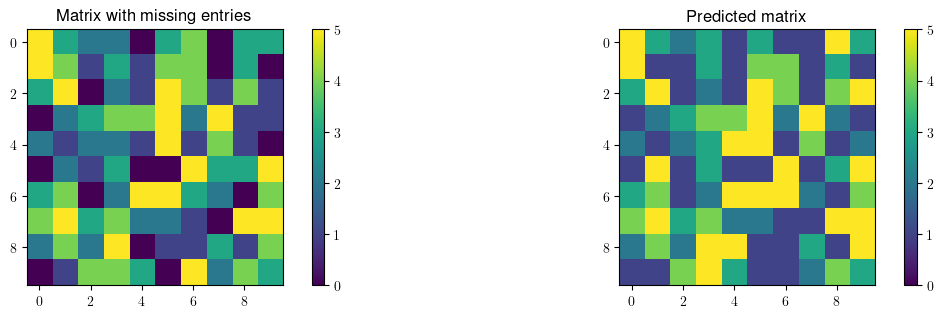

In [50]:
### stochastic gradient implementation 
ITEMS = 10   # number of items
U = 10       # number of users
M = 5        # assumed size of feature vectors
K = 50000    # number of runs
mu = 0.0001  # step-size for stochastic gradient
rho = 0      # regularization factor

lowest_score = 1
highest_score = 5
Delta = highest_score - lowest_score

R = np.random.randint(0, highest_score + 1, size=(U, ITEMS)) # generate ratings matrix with random entries between 0 and 5
                                                             # zero entries are assumed to correspond
                                                             # to unavailable ratings
        
# using the matrix below to compare both stochastic gradient and alternating least-squares on the same data 
# otherwise, use random R as generated above
R = np.array([
    [5, 3, 2, 2, 0, 3, 4, 0, 3, 3],
    [5, 4, 1, 3, 1, 4, 4, 0, 3, 0],
    [3, 5, 0, 2, 1, 5, 4, 1, 4, 1],
    [0, 2, 3, 4, 4, 5, 2, 5, 1, 1],
    [2, 1, 2, 2, 1, 5, 1, 4, 1, 0],
    [0, 2, 1, 3, 0, 0, 5, 3, 3, 5],
    [3, 4, 0, 2, 5, 5, 3, 2, 0, 4],
    [4, 5, 3, 4, 2, 2, 1, 0, 5, 5],
    [2, 4, 2, 5, 0, 1, 1, 3, 1, 4],
    [0, 1, 4, 4, 3, 0, 5, 2, 4, 3]
])

 
R1 = (R-lowest_score)/Delta # normalize scores between 0 and 1.    
                             # Zero (unavailable) entries become negative.

n = 1
IDX_list = []

for u in range(U): # generate a matrix containing the indexes where valid ratings exist within R1
    for m in range(ITEMS):
        if R1[u, m] >= 0:
            IDX_list.append([u, m]) # saves (u,m) into row n in IDX
            n += 1
            
IDX = np.array(IDX_list)
size_IDX = n - 1
                            

alpha = np.random.rand(ITEMS).reshape(-1,1)
theta = np.random.rand(U).reshape(-1,1) 
H = np.random.rand(M,ITEMS) # columns of H are the h_i
W = np.random.rand(M,U)     # columns of W are the w_u

IDXrand = np.zeros((size_IDX,2))

P = np.zeros(K).reshape(-1,1)

for k in range(K):
    P[k] = 0
    for n in range(size_IDX):
        u = IDX[n, 0]
        m = IDX[n, 1]
        rum = R1[u-1, m-1]
        hi = H[:, m-1].reshape(-1,1)
        wu = W[:, u-1].reshape(-1,1)
        thetau = theta[u-1]
        alphai = alpha[m-1]
        e = ( rum - np.dot(hi.T, wu) + thetau + alphai )[0]
        P[k] += e ** 2

    for u in range(U):
        for m in range(ITEMS):
            wu = W[:, u].reshape(-1,1)
            hi = H[:, m].reshape(-1,1)
            P[k] += rho * (np.linalg.norm(wu) ** 2 + np.linalg.norm(hi) ** 2)

    URR = np.random.permutation(size_IDX)
    IDXrand = IDX[URR] ###????

    for n in range(size_IDX):
        u = IDXrand[n, 0]
        m = IDXrand[n, 1]
        rum = R1[u-1, m-1]
        hi = H[:, m-1].reshape(-1,1)
        wu = W[:, u-1].reshape(-1,1)
        thetau = theta[u-1]
        alphai = alpha[m-1]

        e = ( rum - np.dot(hi.T, wu) + thetau + alphai )[0]
        wux = (1 - 2 * mu * rho) * wu + 2 * mu * hi * e
        hi = (1 - 2 * mu * rho) * hi + 2 * mu * wu * e
        thetau -= 2 * mu * e
        alphai -= 2 * mu * e

        H[:, m-1] = hi.reshape(1,-1)
        W[:, u-1] = wux.reshape(1,-1)
        theta[u-1] = thetau.reshape(1,-1)
        alpha[m-1] = alphai.reshape(1,-1)
        
R_hat = np.zeros((U, ITEMS))  # estimating the normalized scores

for u in range(U):
    for m in range(ITEMS):
        hi = H[:, m].reshape(-1,1)
        wu = W[:, u].reshape(-1,1)
        thetau = theta[u]
        alphai = alpha[m]
        R_hat[u, m] = np.dot(hi.T, wu) - thetau - alphai


print('rating matrix and its prediction')
print(R1, R_hat)

R_predicted = np.round((Delta * R_hat) + lowest_score)

for u in range(U):
    for m in range(ITEMS):
        if R_predicted[u, m] > 5:
            R_predicted[u, m] = 5
        if R_predicted[u, m] < 1:
            R_predicted[u, m] = 1

#figure 5 (color-coded matrices)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

clim = [0, 5]
plt.figure(figsize=(12, 6))

plt.subplot(221)
plt.imshow(R, clim=clim, cmap='viridis')
plt.title('Matrix with missing entries')
plt.colorbar()

plt.subplot(222)
plt.imshow(R_predicted, clim=clim, cmap='viridis')
plt.title('Predicted matrix')
plt.colorbar()

plt.tight_layout()
plt.savefig('fig3-ch16.pdf', format='pdf')
plt.show()

**Figure $16.3$** Color coded representation of the entries of the original matrix $R$ with missing entries (*left*) and the recovered matrix $\widehat{R}$ (*right*)

We further denote the risk value at the start of each epoch of index $k$ by 

$$
P(k)\triangleq\sum_{u=1}^U \rho \|w_u\|^2+\sum_{i=1}^I\rho \|h_i\|^2+
\sum_{(u,i)\in{\cal R}}
\Bigl(r_{ui}-h_i^{\sf T} w_u+\theta_u+\alpha_i\Bigr)^2 \quad \text{(16.62)}
$$

where the parameters on the right-hand side are set to the values at the start of epoch $k$.  Figure~$16.4$ plots the evolution of the risk curve (normalized by its maximum value so that its peak value is set to 1).



Results from stochastic gradient solution
Original R matrix:
[[5 3 2 2 0 3 4 0 3 3]
 [5 4 1 3 1 4 4 0 3 0]
 [3 5 0 2 1 5 4 1 4 1]
 [0 2 3 4 4 5 2 5 1 1]
 [2 1 2 2 1 5 1 4 1 0]
 [0 2 1 3 0 0 5 3 3 5]
 [3 4 0 2 5 5 3 2 0 4]
 [4 5 3 4 2 2 1 0 5 5]
 [2 4 2 5 0 1 1 3 1 4]
 [0 1 4 4 3 0 5 2 4 3]]
Predicted R matrix:
[[5. 3. 2. 3. 1. 3. 1. 1. 5. 3.]
 [5. 1. 1. 3. 1. 4. 4. 1. 3. 1.]
 [3. 5. 1. 2. 1. 5. 4. 1. 4. 5.]
 [1. 2. 3. 4. 4. 5. 2. 5. 2. 1.]
 [2. 1. 2. 3. 5. 5. 1. 4. 1. 2.]
 [1. 5. 1. 3. 1. 1. 5. 1. 3. 5.]
 [3. 4. 1. 2. 5. 5. 5. 2. 1. 4.]
 [4. 5. 3. 4. 2. 2. 1. 1. 5. 5.]
 [2. 4. 2. 5. 5. 1. 1. 3. 1. 5.]
 [1. 1. 4. 5. 3. 1. 1. 2. 4. 3.]]


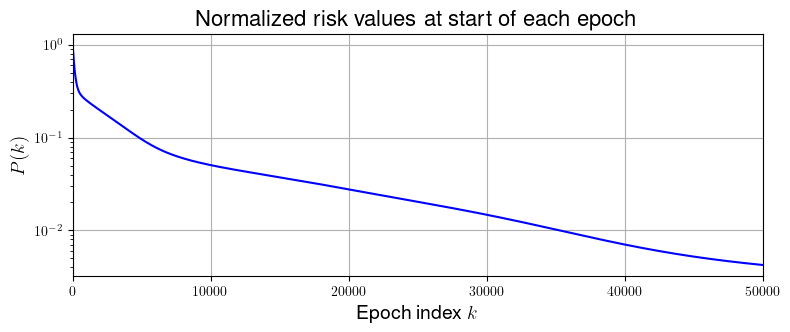

In [53]:
# Display results from stochastic gradient solution
print("Results from stochastic gradient solution")
print("Original R matrix:")
print(R)
print("Predicted R matrix:")
print(R_predicted)

# Figure 6 - Normalized risk values
plt.figure(figsize=(8, 6))

plt.subplot(211)
plt.semilogy(range(1, K + 1), P / max(P), 'b')
plt.xlabel('Epoch index $k$', fontsize=14)
plt.ylabel('$P(k)$', fontsize=14)
plt.title('Normalized risk values at start of each epoch', fontsize=16)
plt.grid()
plt.xlim([0, 50000])
plt.tight_layout()

plt.show()

**Figure $16.4$** Evolution of the risk curve ($16.62$) with its peak value normalized to 1.

## Example 16.8 (l_2-regularized hinge loss)

Consider the $\ell_2-$regularized hinge loss function:

$$
Q(w;\gamma,h)=\rho\|w\|^2\;+\; \max\left\{0,1-\gamma h^{\sf T} w\right\} \quad \text{(16.67)}
$$

We already know that one subgradient construction for it is

$$
 {s}_{Q}(w;\gamma,h)\;=\;2\rho w -\gamma h\,\mathbb{I}\left[\gamma h^{\sf T} w\leq 1\right] \quad \text{(16.68)}
$$

Substituting into ($16.64$), we arrive at the  stochastic subgradient implementation:

$$
\mathbf{w}_{n}=(1-2\mu\rho)\mathbf{w}_{n-1}+\mu\,
\boldsymbol{\gamma}(n) \mathbf{h}_n\,\mathbb{I}\left[\boldsymbol{\gamma}(n) \mathbf{h}_n^{\sf T} \mathbf{w}_{n-1}\leq 1\right] \quad \text{(16.69)}
$$

We illustrate the performance of algorithm ($16.69$) in Fig.$~16.5$, which shows the normalized learning curves in logarithmic scale under both random reshuffling and  uniform sampling with and without smoothing, in addition to the mini-batch implementation. 

wait...generating data
0
10
20
30
40
50
60
70
80
90
limit points ws, w, wbatch, wrr, wbar
[[ 0.08137547  0.09704045  0.0794271   0.07956431  0.09955643]
 [ 0.0036685   0.00765028 -0.005044    0.0032181   0.00530792]
 [ 0.14193148  0.15333245  0.14866714  0.14514902  0.15022353]
 [-0.0088217  -0.01420251 -0.01419146 -0.00904319 -0.0175256 ]
 [ 0.08452152  0.08102518  0.07417235  0.0813772   0.08216027]
 [ 0.12399148  0.12162739  0.1223372   0.12520194  0.12186908]
 [ 0.07495653  0.07356129  0.08357785  0.07993832  0.07359176]
 [ 0.08893835  0.11728046  0.09085389  0.09063168  0.11624319]
 [ 0.18542614  0.19155367  0.178336    0.18854209  0.19229206]
 [ 0.06114052  0.05689102  0.05653408  0.06186707  0.05772365]]
minimum risk and limit risk values and squared norms of (w-ws), (wbatch-ws), (wrr-ws), (wbar-ws)
[[0.89897491]] [0.90119303] [0.90111329] [0.89943804] [0.899171] 0.001298821750051095 0.0012940635129969284 0.00041323489643654816 6.315946914234464e-05
Minimum risk values for stoch

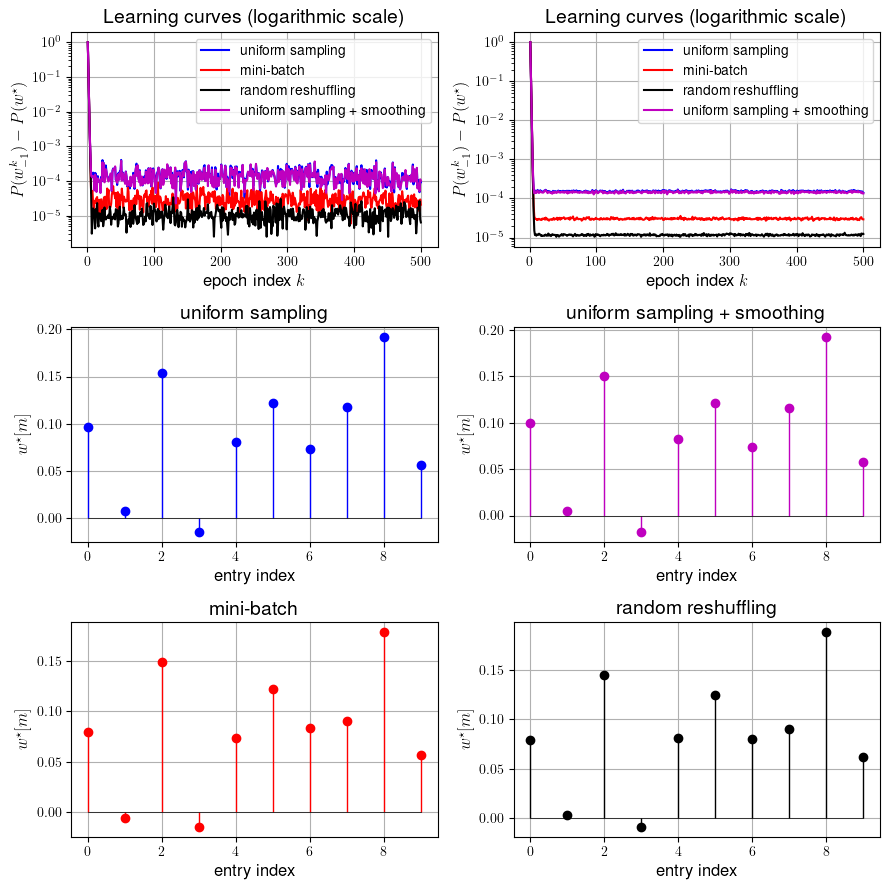

In [43]:
# l2-regularized SVM empirical risk
# P(w) = rho \|w\|^2 + (1/N)sum_{n=0}^{N-1} max(0,1-gamma(m) h_m' w)

rho = 1         # regularization parameter
mu = 0.001      # step-size for stochastic gradient
mubatch = 0.001 # step-size for batch implementation

kappa = 0.95 # used for exponential smoothing
S = 0 # used for smoothing

M = 10   # feature size
N = 500  # number of data points
K = 500  # number of epochs
B = 5    # size of mini-batch

print('wait...generating data');

# Generating data and checking it
zo = np.random.rand(M).reshape(-1,1) # underlying parameter model for logistic data
p, gamma_vec, H = generate_logistic(N,zo,0) # logistic model with zero offset
ws, Ps, thetas = svm_minimizer(rho, gamma_vec, H,0) # learns ws only


#Initializations
winit = np.random.randn(M).reshape(-1,1) # initial condition for weight under uniform sampling

Pmean = np.zeros(K).reshape(-1,1) # learning curve over epochs under uniform sampling
Pbatchmean = np.zeros(K).reshape(-1,1) #learning curve over all epochs for minibatch
Prrmean = np.zeros(K).reshape(-1,1) # learning curve over epochs under random reshuffling
Psmoothmean = np.zeros(K).reshape(-1,1) # learning curve under smoothing (used only under uniform sampling here)

experiments = 100


for ell in range(experiments):
    if ell % 10 == 0 :
        print(ell)
    
    P = np.zeros(K).reshape(-1,1) # learning curve over epochs under uniform sampling
    Pbatch = np.zeros(K).reshape(-1,1) #learning curve over all epochs for minibatch
    Prr = np.zeros(K).reshape(-1,1) # learning curve over epochs under random reshuffling
    Psmooth = np.zeros(K).reshape(-1,1) # learning curve under smoothing (used only under uniform sampling here)
    
    w = winit.copy()
    wbatch = winit.copy()     # same for batch implementation
    wrr = winit.copy()        # same for weight under random reshuffling
    wsmooth = winit.copy()    # used for smoothing
    wbar = np.zeros(M).reshape(-1,1)
    
    for k in range(K):  #iterating over runs
        # print(k) # epoch index
        S = 0 # used for for smoothing
        
        for m in range(N): # evaluating empirical risk function at start of each epoch
            h_m = H[:, m].reshape(-1,1) # feature vector
            gamma_m = gamma_vec[m] # label
            a = ( 1 - gamma_m * np.dot(h_m.T, w) )[0]
            P[k] += max(0, a)
            
            abatch = ( 1 - gamma_m * np.dot(h_m.T, wbatch) )[0]
            Pbatch[k] += max(0, abatch)
            
            arr = ( 1 - gamma_m * np.dot(h_m.T, wrr) )[0]
            Prr[k] += max(0, arr)
            
            asmooth = ( 1 - gamma_m * np.dot(h_m.T, wsmooth) )[0]
            Psmooth[k] += max(0, asmooth)
        
        P[k] = (1 / N) * P[k] #uniform sampling
        P[k] += rho * (np.linalg.norm(w) ** 2) # risk difference value at start of epoch k
    
        
        Pbatch[k] = (1 / N) * Pbatch[k] # mini-batch
        Pbatch[k] += rho * (np.linalg.norm(wbatch) ** 2)
        
        Prr[k] = (1 / N) * Prr[k] #random reshuffling
        Prr[k] += rho * (np.linalg.norm(wrr) ** 2)
        
        Psmooth[k] = (1 / N) * Psmooth[k] # exponential smoothing
        Psmooth[k] += rho * (np.linalg.norm(wsmooth) ** 2)
        
        URR = np.random.permutation(N) # random permutation of the samples
        
        for n in range(N): # iterating over data in each epoch
            u = np.random.randint(N) # uniform sampling
            h_u = H[:, u].reshape(-1,1) # feature vector
            gamma_u = gamma_vec[u] # label
            a = (gamma_u * np.dot(h_u.T, w) <= 1)
            s = gamma_u * h_u * a #gradient vector
            
            w = (1 - 2 * mu * rho) * w + mu * s # updated w (stochastic subgradient alg)
            
            asmooth = (gamma_u * np.dot(h_u.T, wsmooth) <= 1)
            ssmooth = gamma_u * h_u * asmooth # gradient vector
            wsmooth = (1 - 2 * mu * rho) * wsmooth + mu * ssmooth # stochastic subgradient with smoothing
            S = kappa * S + 1 # exponential smoothing
            wbar = (1 - (1 / S)) * wbar + (1 / S) * wsmooth # stochastic subgradient with smoothing
            
            U = np.random.choice(N, B, replace=False) # B random samples for batch implementation
            sbatch = np.zeros(M).reshape(-1,1)
            
            for b in range(B):
                h_b = H[:, U[b]].reshape(-1,1) # feature vector
                gamma_b = gamma_vec[U[b]] # label
                abatch = (gamma_b * np.dot(h_b.T, wbatch) <= 1)
                sbatch += gamma_b * h_b * abatch # gradient vector
            
            sbatch /= B # gradient vector for batch implementation
            wbatch = (1 - 2 * mubatch * rho) * wbatch + mubatch * sbatch # stochastic mini-batch implementation
            
            u = URR[n] # random reshuffling
            h_u = H[:, u].reshape(-1,1) # feature vector
            gamma_u = gamma_vec[u] # label
            arr = (gamma_u * np.dot(h_u.T, wrr) <= 1)
            srr = gamma_u * h_u * arr
            wrr = (1 - 2 * mu * rho) * wrr + mu * srr #gradient vector
        
        wsmooth = wbar
    
    Pmean += P
    Pbatchmean += Pbatch
    Prrmean += Prr
    Psmoothmean += Psmooth

Pmean = Pmean/experiments
Pbatchmean = Pbatchmean/experiments
Prrmean = Prrmean/experiments
Psmoothmean = Psmoothmean/experiments

print("limit points ws, w, wbatch, wrr, wbar")
print(np.column_stack((ws, w, wbatch, wrr, wbar)))

print("minimum risk and limit risk values and squared norms of (w-ws), (wbatch-ws), (wrr-ws), (wbar-ws)")
print(Ps, Pmean[K - 1], Psmoothmean[K - 1], Pbatchmean[K - 1], Prrmean[K - 1],
      np.linalg.norm(w - ws) ** 2, np.linalg.norm(wbar - ws) ** 2,
      np.linalg.norm(wbatch - ws) ** 2, np.linalg.norm(wrr - ws) ** 2)

print("Minimum risk values for stochastic subgradient, smoothing, batch, random reshuffling")
print(np.mean(Pmean[K - 6 : K - 1]), np.mean(Psmoothmean[K - 6 : K - 1]),
      np.mean(Pbatchmean[K - 6 : K - 1]), np.mean(Prrmean[K - 6 : K - 1]))

print("step sizes")
print(mu, mubatch)

print("number of points")
print(N)

print("rho")
print(rho)

print("dimension of model")
print(M)

print("number of runs")
print(K)

print("kappa for smoothing")
print(kappa)


#figure 5 (Learning curves)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(9, 9))


plt.subplot(321)
plt.semilogy(range(1, K+1), ((P - Ps) / max(P - Ps)), '-b',
             range(1, K+1), ((Pbatch - Ps) / max(Pbatch - Ps)), '-r',
             range(1, K+1), ((Prr - Ps) / max(Prr - Ps)), '-k',
             range(1, K+1), ((Psmooth - Ps) / max(Psmooth - Ps)), '-m')
plt.xlabel('epoch index $k$', fontsize=12)
plt.ylabel('$P(w_{-1}^k)-P(w^{\star})$', fontsize=12)
plt.title('Learning curves (logarithmic scale)', fontsize=14)
plt.legend(['uniform sampling', 'mini-batch', 'random reshuffling', 'uniform sampling + smoothing'])
plt.grid()



plt.subplot(322)
plt.semilogy(range(1, K+1), ((Pmean - Ps) / max(Pmean - Ps)), '-b',
             range(1, K+1), ((Pbatchmean - Ps) / max(Pbatchmean - Ps)), '-r',
             range(1, K+1), ((Prrmean - Ps) / max(Prrmean - Ps)), '-k',
             range(1, K+1), ((Psmoothmean - Ps) / max(Psmoothmean - Ps)), '-m')
plt.xlabel('epoch index $k$', fontsize=12)
plt.ylabel('$P(w_{-1}^k)-P(w^{\star})$', fontsize=12)
plt.title('Learning curves (logarithmic scale)', fontsize=14)
plt.legend(['uniform sampling', 'mini-batch', 'random reshuffling', 'uniform sampling + smoothing'])
plt.grid()


# Stem plots for weights
for i, (title, weight, color) in enumerate([("uniform sampling", w, 'bo'), ("uniform sampling + smoothing", wsmooth,'mo'),
                                     ("mini-batch", wbatch, 'ro'), ("random reshuffling", wrr, 'ko')]):
    plt.subplot(3, 2, i + 3)
    markerline, stemlines, baseline = plt.stem(weight, markerfmt=color, linefmt=color, basefmt='k')
    stemlines.set_linewidth(1)
    baseline.set_linewidth(0.5)
    plt.xlabel('entry index', fontsize=12)
    plt.ylabel('$w^{\star}[m]$', fontsize=12)
    plt.title(title, fontsize=14)
    plt.axis('tight')
    plt.grid()

plt.tight_layout()
plt.show()

**Figure $16.5$** (*Top row*) Learning curves $P(w_{-1}^k)$ relative to the minimum risk value $P(w^{\star})$ in normalized logarithmic scale for the stochastic subgradient implementation ($$16.64) under random reshuffling and uniform sampling with and without smoothing, in addition to a mini-batch implementation. (*Lower rows*) Limit values for the weight iterates obtained under different data sampling policies.


The simulation uses $\rho=1$, $\mu=0.001$, $\kappa=0.95,$ and $M=10$. It generates $N=500$ random pairs of data $\{\gamma(m),h_m\}$ according to the logistic model described earlier in Example$~16.49$. A total of $K=500$ epochs are run over the data. The learning curves are plotted in normalized logarithmic scale in line with construction
($16.49$), where $w^{\star}$ is approximated by the limit value of the weight iterate after sufficient convergence. The mini-batch implementation employs mini-batches of size $B=5$ samples. Each learning curve is generated by plotting the values of the risk function at the start of each epoch, namely, $P(w_{-1}^k)$. 
  The plot on the left in the top row of the figure shows the evolution of these values relative to the minimum risk value $P(w^{\star})$ for one run of the algorithm over the first $100$ epochs. The noisy variations in these learning curves are a reflection of the stochastic nature of the updates. We repeat this experiment for a total of $L=100$ times and average the learning curves over these experiments. Each experiment starts from the same initial condition $w_{-1}$. The result leads to the smoother curves shown in the plot on the right in the top row of the figure (for the first 50 epochs).  The curves illustrate that the  mini-batch and random reshuffling versions of the stochastic subgradient algorithm lead to improved steady-state performance. The plots in the bottom two rows show the limiting value of the weight iterates under four data sampling policies. 

## Example 16.12 (LASSO or basis pursuit)

Consider the quadratic risk with elastic-net regularization:

$$
P(w)\;=\;
\alpha\|w\|_1\;+\;\rho\|w\|^2\;+\;\frac{1}{N}\sum_{m=0}^{N-1}\;\left({\gamma}(m)-h_{m}^{\sf T} w\right)^2,\;\;w\in\mathbb{R}^{M} \quad \text{(16.89)}
$$

so that

$$
q(w)=\alpha\|w\|_1,\;\;\;Q_u(w;\gamma(n),h_n)\;=\;\rho\|w\|^2+({\gamma}(n)-h_{n}^{\sf T} w)^2 \quad \text{(16.90)}
$$

In this case, the stochastic proximal recursion ($16.87$) becomes

$$
\mathbf{z}_{n} = (1-2\mu \rho)\mathbf{w}_{n-1} + 2\mu \mathbf{h}_n(\boldsymbol{\gamma}(n) - \mathbf{h}_n^{\sf T} \mathbf{w}_{n-1}) \quad \text{(16.91a)}
$$

$$
\mathbf{w}_{n} = \mathbb{T}_{\mu\alpha}(\mathbf{z}_n) \quad \text{(16.91b)}
$$

in terms of the soft-thresholding operator applied to $\mathbf{z}_n$.

We illustrate the performance of the algorithm in Fig.$~16.6$, which shows the normalized learning curve in logarithmic scale under uniform sampling  using $\rho=0$, $\alpha=1$, $\mu=0.001$, and $M=10$. The simulation generates $N=500$ random pairs of data $\{\gamma(m),h_m\}$ according to the same linear model ($16.39$). 
The minimizer $w^{\star}$ for the risk ($16.89$}) is estimated by running the batch proximal algorithm ($16.85a$), which employs the full gradient vector of $P(w)$, for a sufficient number of iterations. The plot on the left in the top row of the figure shows the normalized learning curve in logarithmic scale, where $P(w)$ is evaluated at the start of each epoch. The plot on the right in the first row averages these learning curves over $L=100$ experiments to generate a smoother curve. The lower plot in the figure shows the limit value of $w_n$ resulting from ($16.91a$)--($16.91b$) and obtained after running $K=300$ epochs over the data. It is seen that $w_n$ approaches $w^{\star}$ and that it also exhibits sparsity. 

wait...generating data
0
10
20
30
40
50
60
70
80
limit points w and ws
[[ 0.0038861   0.        ]
 [ 0.00336659  0.        ]
 [-0.95055667 -0.97616607]
 [ 0.02455051  0.        ]
 [-0.58235186 -0.54899388]
 [ 0.64520981  0.64461505]
 [-1.04129035 -1.06515065]
 [ 0.00216583  0.        ]
 [ 0.00389461  0.        ]
 [-0.60334966 -0.5750539 ]]
limit risk value and squared norm (w-ws)^2
[5.33477172] [5.35528995] 5.355604110118005 0.0037879361882338356
step size
0.001
number of points
500
alpha
1
dimension of model
10
number of runs
300
minimum risk value
[5.33477172]


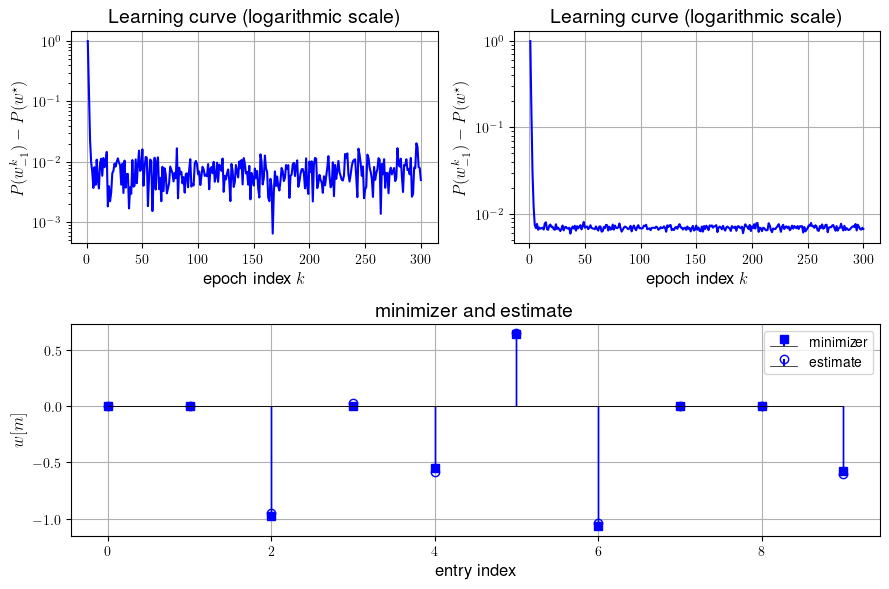

In [44]:
# l1-regularized LASSO risk
# P(w) = alpha ||w||_1 + (1/N) sum_{n=0}^{N-1} (gamma(m) - h_m'w)^2

alpha = 1    # regularization parameter
mu = 0.001   # step-size for stochastic gradient

M = 10   # feature size
N = 500  # number of data points
K = 300  # number of epochs

print('wait...generating data')
stdv = 0.01     # standard deviation of measurement noise
wo = np.random.randn(M).reshape(-1,1) # randomly chosen parameter model
H = np.random.randn(M,N)# feature vectors; one per column
gamma_vec = np.dot(H.T, wo) + stdv*np.random.randn(N).reshape(-1,1)
# approximate estimate for ws and minimum risk value
ws, Ps = lasso_minimizer(alpha, gamma_vec, H)

winit = np.random.randn(M).reshape(-1,1) # initial condition for weight under uniform sampling
Pmean = np.zeros(K).reshape(-1,1) # learning curve over epochs under uniform sampling

experiments = 90


for ell in range(experiments):
    if ell % 10 == 0 :
        print(ell)
    
    P = np.zeros(K).reshape(-1,1) # learning curve over epochs under uniform sampling
    w = np.zeros(M).reshape(-1,1)
    
    for k in range(K): #iterating over runs
        # print(k) # epoch index
        
        for m in range(N):
            h_m = H[:, m].reshape(-1,1) # feature vector
            gamma_m = gamma_vec[m] # label
            a = gamma_m - np.dot(h_m.T, w)[0]
            P[k] += a ** 2
        
        P[k] = (1 / N) * P[k]
        P[k] += alpha * np.linalg.norm(w, 1) #risk value 
        
        for n in range(N): # iterating over data in each epoch
            u = np.random.randint(N) # uniform sampling
            h_u = H[:, u].reshape(-1,1) # feature vector
            gamma_u = gamma_vec[u] # label
            a = gamma_u - np.dot(h_u.T, w)
            s = 2 * h_u * a #gradient vector
            
            z = w + mu * s  # updated w (stochastic proximal gradient implementation)
            w = soft_threshold(z,mu*alpha)
            #end of one epoch
    
    Pmean += P

Pmean /= experiments

print("limit points w and ws")
print(np.column_stack((w, ws)))

print("limit risk value and squared norm (w-ws)^2")
print(Ps, Pmean[K - 1], np.mean(Pmean[K - 5:K]), np.linalg.norm(w - ws) ** 2)

print("step size")
print(mu)

print("number of points")
print(N)

print("alpha")
print(alpha)

print("dimension of model")
print(M)

print("number of runs")
print(K)

print("minimum risk value")
print(Ps)


#figure 6 (Learning curves)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
plt.figure(figsize=(9, 6))

# Learning curve subplot 1
plt.subplot(221)
plt.semilogy(range(1, K + 1), ((P - Ps) / max(P - Ps)), '-b')
plt.xlabel('epoch index $k$', fontsize=12)
plt.ylabel('$P(w_{-1}^k)-P(w^{\star})$', fontsize=12)
plt.title('Learning curve (logarithmic scale)', fontsize=14)
plt.grid()

# Learning curve subplot 2
plt.subplot(222)
plt.semilogy(range(1, K + 1), ((Pmean - Ps) / max(Pmean - Ps)), '-b')
plt.xlabel('epoch index $k$', fontsize=12)
plt.ylabel('$P(w_{-1}^k)-P(w^{\star})$', fontsize=12)
plt.title('Learning curve (logarithmic scale)', fontsize=14)
plt.grid()

# Minimizer and estimate subplot
plt.subplot(212)
markerline, stemlines, baseline = plt.stem(ws, linefmt='bs', markerfmt='bs', basefmt='k', label='minimizer')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5)
markerline, stemlines, baseline = plt.stem(w, linefmt='b', markerfmt='bo', basefmt='k', label='estimate')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5)
markerline.set_markerfacecolor('none') # make the squares hollow to match with the book

plt.xlabel('entry index', fontsize=12)
plt.ylabel('$w[m]$', fontsize=12)
plt.title('minimizer and estimate', fontsize=14)
plt.axis('tight')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

**Figure $16.6$** (*Top left*) Learning curve $P(w_{-1}^k)$ relative to the minimum risk value $P(w^{\star})$ in normalized logarithmic scale for the stochastic proximal gradient implementation ($16.91a$)--($16.91b$)  under uniform sampling. (*Top right*) Learning curve obtained by averaging over $100$ experiments. (*Bottom*) The limiting value of the weight iterate in comparison to the minimizer $w^{\star}$.